In [2]:
file_id = "1esNrC-1aOLER9fRQRvbxORqjLokolnCB"

In [3]:
!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From (original): https://drive.google.com/uc?id=1esNrC-1aOLER9fRQRvbxORqjLokolnCB
From (redirected): https://drive.google.com/uc?id=1esNrC-1aOLER9fRQRvbxORqjLokolnCB&confirm=t&uuid=8905fd39-4f4f-4830-ba74-5160002fed60
To: /content/project_part2.zip
100% 7.15G/7.15G [00:36<00:00, 198MB/s]


In [4]:
!unzip project_part2.zip -d ./project_part2

Archive:  project_part2.zip
replace ./project_part2/project_part2/augmented_farm_backgrounds/test/Apple___Apple_scab/0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966_final_masked_farm.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import os
import shutil
import glob
import random
from sklearn.model_selection import train_test_split

random.seed(42)

# Source folder for segmented images
src_segmented = './project_part2/project_part2/plant_images/segmented'

# Destination directories for the segmented experiment:
dest_segmented_train = '/content/data_segmented_train'
dest_segmented_val   = '/content/data_segmented_val'
dest_segmented_test  = '/content/data_segmented_test'

# Create folder structure for each destination
for dest in [dest_segmented_train, dest_segmented_val, dest_segmented_test]:
    os.makedirs(os.path.join(dest, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(dest, 'unhealthy'), exist_ok=True)

# Iterate over each category folder in the segmented data
categories = [cat for cat in os.listdir(src_segmented) if os.path.isdir(os.path.join(src_segmented, cat))]
print("Segmented Categories:", categories)

for cat in categories:
    cat_path = os.path.join(src_segmented, cat)
    # Get image files
    images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
    # Determine label based on folder name
    label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

    # Split: 60% train, 20% validation, 20% test
    if images:
        train_imgs, temp_imgs = train_test_split(images, train_size=0.6, random_state=42)
        val_imgs, test_imgs   = train_test_split(temp_imgs, test_size=0.5, random_state=42)

        for img in train_imgs:
            shutil.copy(img, os.path.join(dest_segmented_train, label))
        for img in val_imgs:
            shutil.copy(img, os.path.join(dest_segmented_val, label))
        for img in test_imgs:
            shutil.copy(img, os.path.join(dest_segmented_test, label))

print("Segmented data splitting completed!")

Segmented Categories: ['Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Apple_scab', 'Tomato___Target_Spot', 'Peach___healthy', 'Grape___Black_rot', 'Apple___healthy', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Strawberry___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Peach___Bacterial_spot', 'Potato___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___healthy', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn_(maize)___Common_rust_', 'Tomato___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___healthy', 'Apple___

In [6]:
dest_farm_train = '/content/data_farm_train'
dest_farm_val   = '/content/data_farm_val'
dest_farm_test  = '/content/data_farm_test'

In [7]:
dest_pixel_train = '/content/data_pixel_train'
dest_pixel_val   = '/content/data_pixel_val'
dest_pixel_test  = '/content/data_pixel_test'

In [8]:
def copy_presplit_data(src, dest_train, dest_val, dest_test):
    splits = {'train': dest_train, 'val': dest_val, 'test': dest_test}

    for split_name, split_dest in splits.items():
        split_src = os.path.join(src, split_name)

        os.makedirs(os.path.join(split_dest, 'healthy'), exist_ok=True)
        os.makedirs(os.path.join(split_dest, 'unhealthy'), exist_ok=True)

        categories = [cat for cat in os.listdir(split_src) if os.path.isdir(os.path.join(split_src, cat))]
        print(f"Processing {split_name} split from {src}: {categories}")

        for cat in categories:
            cat_path = os.path.join(split_src, cat)
            images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
            label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

            for img in images:
                shutil.copy(img, os.path.join(split_dest, label))

    print("Data copying completed")

In [9]:
# Handle pre-split augmented farm backgrounds
copy_presplit_data(
    src='./project_part2/project_part2/augmented_farm_backgrounds',
    dest_train='/content/data_farm_train',
    dest_val='/content/data_farm_val',
    dest_test='/content/data_farm_test'
)



Processing train split from ./project_part2/project_part2/augmented_farm_backgrounds: ['Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Apple_scab', 'Tomato___Target_Spot', 'Peach___healthy', 'Grape___Black_rot', 'Apple___healthy', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Strawberry___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Peach___Bacterial_spot', 'Potato___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___healthy', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn_(maize)___Common_rust_', 'Tomato___Bacterial_spot', 'Co

In [10]:
# Handle pre-split augmented random pixels
copy_presplit_data(
    src='./project_part2/project_part2/augmented_random_pixels',
    dest_train='/content/data_pixel_train',
    dest_val='/content/data_pixel_val',
    dest_test='/content/data_pixel_test'
)

Processing train split from ./project_part2/project_part2/augmented_random_pixels: ['Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Apple_scab', 'Tomato___Target_Spot', 'Peach___healthy', 'Grape___Black_rot', 'Apple___healthy', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Strawberry___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Peach___Bacterial_spot', 'Potato___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___healthy', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn_(maize)___Common_rust_', 'Tomato___Bacterial_spot', 'Corn_

Augmented Farm Training Set Samples:


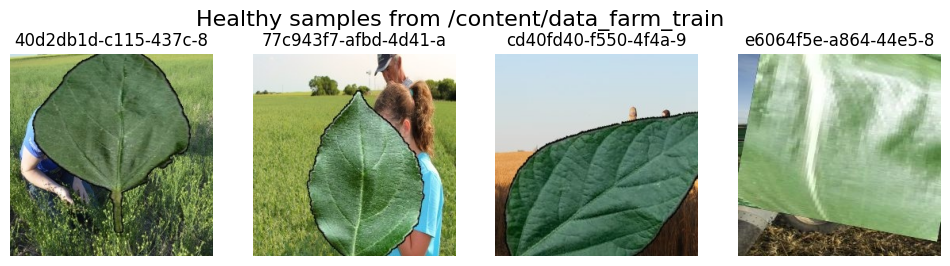

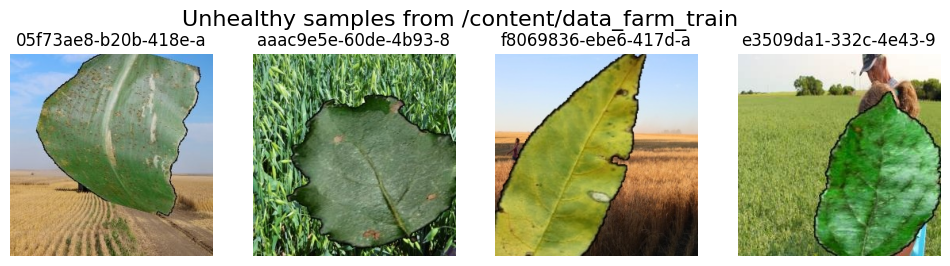

Augmented Pixel Training Set Samples:


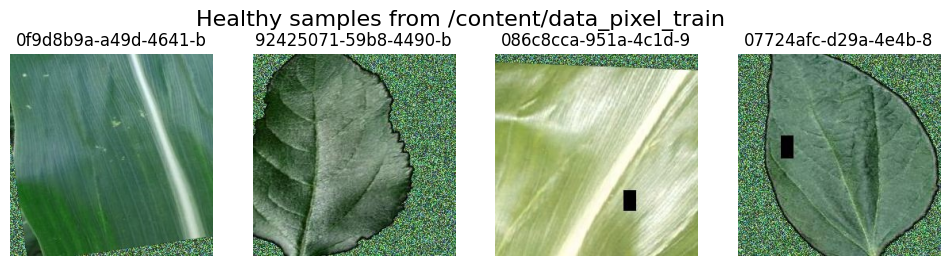

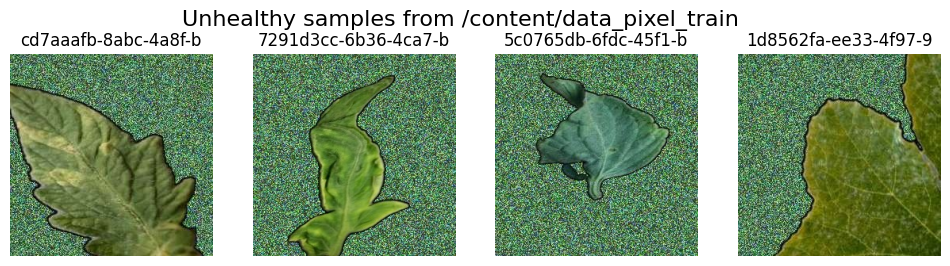

Segmented Training Set Samples:


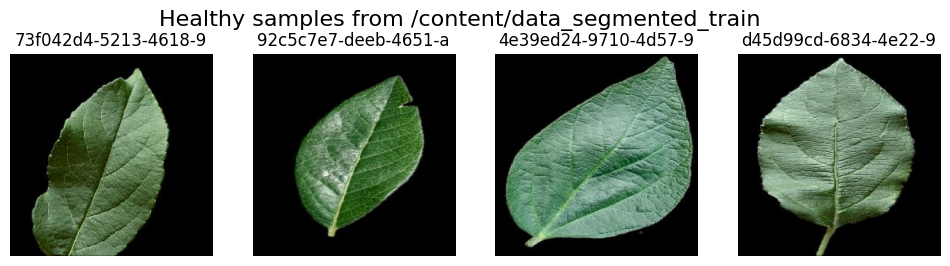

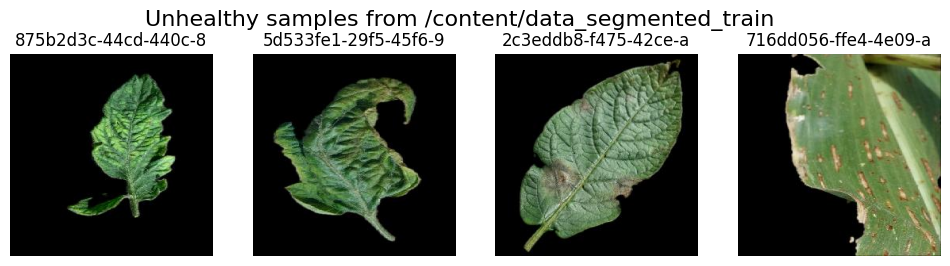

In [11]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_samples_from_category(base_dir, category, num_images=4):
    """
    Display a few sample images from a specified category folder.
    """
    cat_path = os.path.join(base_dir, category)
    # Get image filenames with common extensions
    image_files = [f for f in os.listdir(cat_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not image_files:
        print(f"No images found in {cat_path}")
        return
    sample_files = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(12, 3))
    plt.suptitle(f"{category.capitalize()} samples from {base_dir}", fontsize=16)

    for i, file in enumerate(sample_files):
        img_path = os.path.join(cat_path, file)
        img = mpimg.imread(img_path)
        plt.subplot(1, len(sample_files), i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file[:20])
    plt.show()

def show_samples_from_dataset(dataset_dir, num_images=4):
    """
    Display sample images for both healthy and unhealthy categories
    from a dataset directory that contains subfolders for each category.
    """
    for category in ['healthy', 'unhealthy']:
        show_samples_from_category(dataset_dir, category, num_images=num_images)

# Make sure these directory variables have been defined from your data splitting steps:
# dest_farm_train, dest_pixel_train, dest_segmented_train

print("Augmented Farm Training Set Samples:")
show_samples_from_dataset(dest_farm_train)

print("Augmented Pixel Training Set Samples:")
show_samples_from_dataset(dest_pixel_train)

print("Segmented Training Set Samples:")
show_samples_from_dataset(dest_segmented_train)

In [13]:
import tensorflow as tf
batch_size = 32
img_size = (224, 224)

# --- For the Augmented Farm Experiment ---
train_ds_farm = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds_farm = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- For the Augmented Pixel Experiment ---
train_ds_pixel = tf.keras.preprocessing.image_dataset_from_directory(
    dest_pixel_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds_pixel = tf.keras.preprocessing.image_dataset_from_directory(
    dest_pixel_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- For the Segmented Experiment ---
train_ds_segmented = tf.keras.preprocessing.image_dataset_from_directory(
    dest_segmented_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

val_ds_segmented = tf.keras.preprocessing.image_dataset_from_directory(
    dest_segmented_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- Common Test Set (from Augmented Farm Data) ---
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_test,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
def prepare_ds(ds):
    return ds.prefetch(buffer_size=AUTOTUNE)

train_ds_farm    = prepare_ds(train_ds_farm)
val_ds_farm      = prepare_ds(val_ds_farm)
train_ds_pixel   = prepare_ds(train_ds_pixel)
val_ds_pixel     = prepare_ds(val_ds_pixel)
train_ds_segmented = prepare_ds(train_ds_segmented)
val_ds_segmented = prepare_ds(val_ds_segmented)
test_ds          = prepare_ds(test_ds)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def create_model(input_shape=(224, 224, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification: healthy vs unhealthy
    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three identical models for the experiments
model_farm = create_model()
model_pixel = create_model()
model_segmented = create_model()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

Found 32572 files belonging to 2 classes.
Found 10849 files belonging to 2 classes.
Found 32572 files belonging to 2 classes.
Found 10849 files belonging to 2 classes.
Found 37997 files belonging to 2 classes.
Found 13096 files belonging to 2 classes.
Found 10885 files belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
epochs = 10

print("Training model on Augmented Farm Data:")
history_farm = model_farm.fit(train_ds_farm, validation_data=val_ds_farm, epochs=epochs)

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))


Training model on Augmented Farm Data:
Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7953 - loss: 0.4528 - val_accuracy: 0.8061 - val_loss: 0.4520
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8274 - loss: 0.3845 - val_accuracy: 0.8263 - val_loss: 0.3926
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8370 - loss: 0.3652 - val_accuracy: 0.8310 - val_loss: 0.3841
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8445 - loss: 0.3528 - val_accuracy: 0.8314 - val_loss: 0.3777
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8513 - loss: 0.3409 - val_accuracy: 0.8349 - val_loss: 0.3783
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8564 - loss: 0.3284 - val_accuracy: 0.8302 - val_loss: 0.3777
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8613 - loss: 0.3189 - val_accuracy: 0.8206 - val_loss: 0.3891
Epoch 8/10
1018/1018 ━━━━━━━━━━━━━━━━

In [15]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

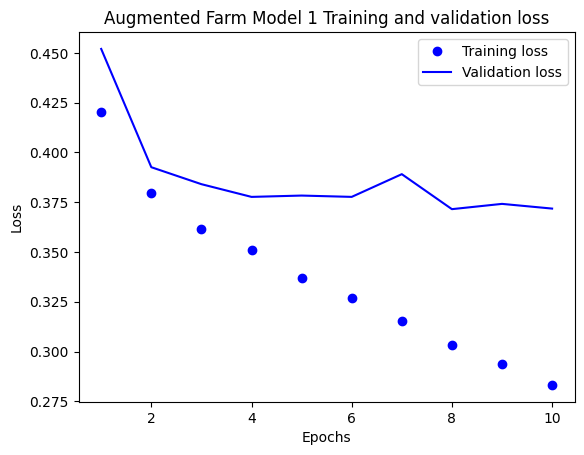

In [16]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 1 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

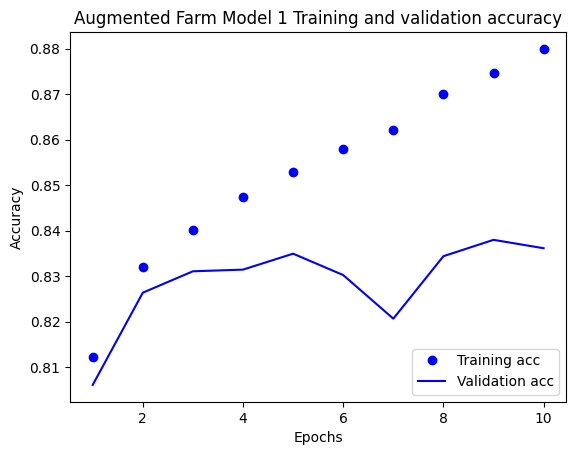

In [17]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 1 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [18]:
print("Training model on Augmented Pixel Data:")
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs)

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Training model on Augmented Pixel Data:
Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.8220 - loss: 0.3845 - val_accuracy: 0.8631 - val_loss: 0.3087
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8627 - loss: 0.3069 - val_accuracy: 0.7976 - val_loss: 0.4363
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8702 - loss: 0.2903 - val_accuracy: 0.8641 - val_loss: 0.3075
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8794 - loss: 0.2763 - val_accuracy: 0.8722 - val_loss: 0.2904
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8870 - loss: 0.2601 - val_accuracy: 0.8722 - val_loss: 0.2888
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8936 - loss: 0.2483 - val_accuracy: 0.8580 - val_loss: 0.3158
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8958 - loss: 0.2431 - val_accuracy: 0.8750 - val_loss: 0.2843
Epoch 8/10
1018/1018 ━━━━━━━━━━━━━━━

In [19]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

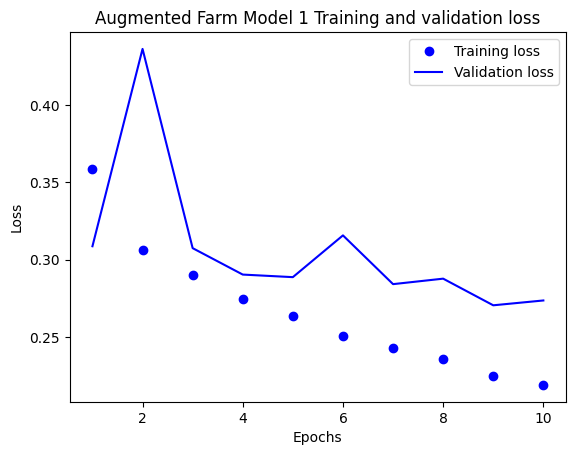

In [20]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 1 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

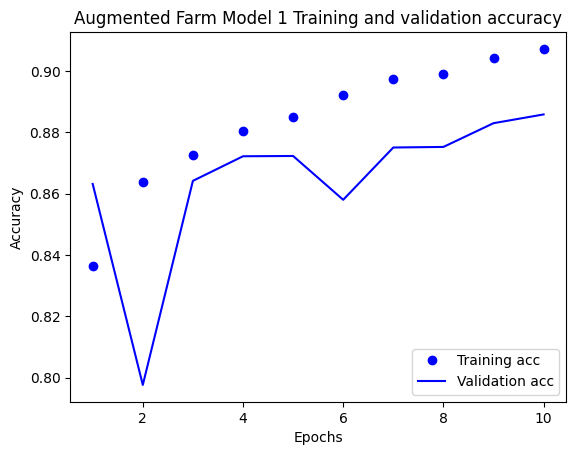

In [21]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 1 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [23]:
print("Training model on Segmented Data:")
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs)


print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Training model on Segmented Data:
Epoch 1/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9817 - loss: 0.0490 - val_accuracy: 0.9633 - val_loss: 0.1055
Epoch 2/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9819 - loss: 0.0465 - val_accuracy: 0.9605 - val_loss: 0.1145
Epoch 3/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9843 - loss: 0.0411 - val_accuracy: 0.9646 - val_loss: 0.1114
Epoch 4/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9870 - loss: 0.0354 - val_accuracy: 0.9569 - val_loss: 0.1286
Epoch 5/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9860 - loss: 0.0359 - val_accuracy: 0.9611 - val_loss: 0.1298
Epoch 6/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9900 - loss: 0.0282 - val_accuracy: 0.9609 - val_loss: 0.1280
Epoch 7/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9903 - loss: 0.0265 - val_accuracy: 0.9639 - val_loss: 0.1277
Epoch 8/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 

In [24]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

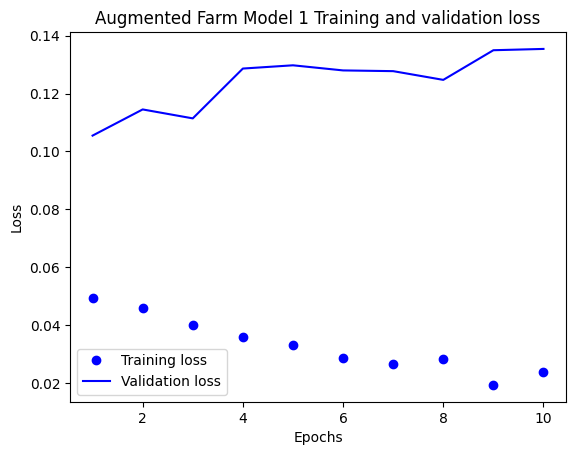

In [25]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 1 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

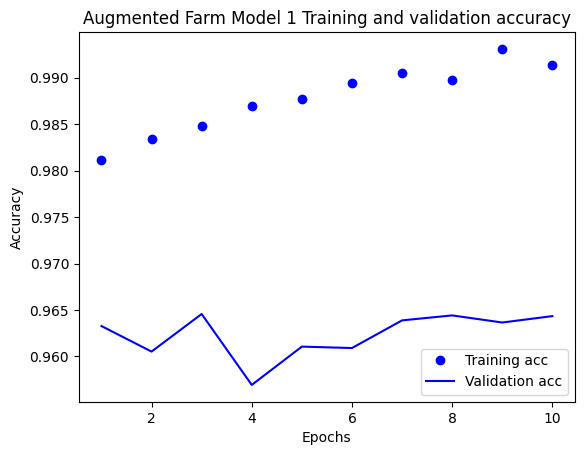

In [26]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 1 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

def create_improved_model1(input_shape=(224, 224, 3), dropout_rate=0.5):
    # Data augmentation layers (active only during training)
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ])

    inputs = tf.keras.Input(shape=input_shape)
    # Apply data augmentation to the inputs
    x = data_augmentation(inputs)

    # Load the pre-trained MobileNetV2 model and freeze its weights
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False
    x = base_model(x, training=False)

    # Global pooling and dense layers for classification
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    # Dropout to reduce overfitting
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification: healthy vs unhealthy

    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three improved models for the experiments
model_farm = create_improved_model1()
model_pixel = create_improved_model1()
model_segmented = create_improved_model1()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [28]:
epochs = 10

print("Training model on Augmented Farm Data:")
history_farm = model_farm.fit(train_ds_farm, validation_data=val_ds_farm, epochs=epochs)

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))

Training model on Augmented Farm Data:
Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.7723 - loss: 0.4945 - val_accuracy: 0.7781 - val_loss: 0.4741
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8056 - loss: 0.4312 - val_accuracy: 0.8040 - val_loss: 0.4322
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8167 - loss: 0.4154 - val_accuracy: 0.8032 - val_loss: 0.4263
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8168 - loss: 0.4094 - val_accuracy: 0.8107 - val_loss: 0.4161
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8229 - loss: 0.4073 - val_accuracy: 0.8037 - val_loss: 0.4294
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8245 - loss: 0.4016 - val_accuracy: 0.8115 - val_loss: 0.4259
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8259 - loss: 0.3968 - val_accuracy: 0.8099 - val_loss: 0.4255
Epoch 8/10
1018/1018 ━━━━━━━━━━━━━━━━

In [29]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

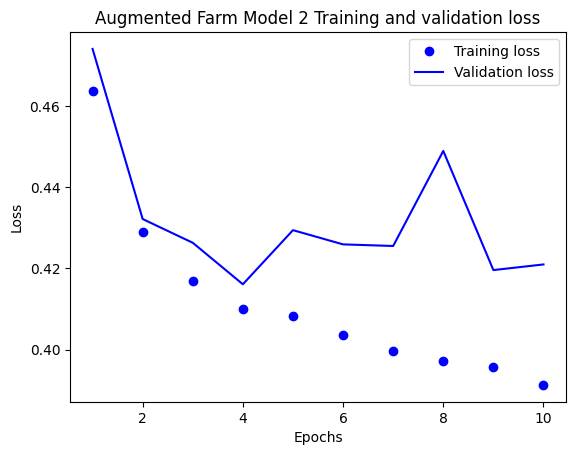

In [30]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

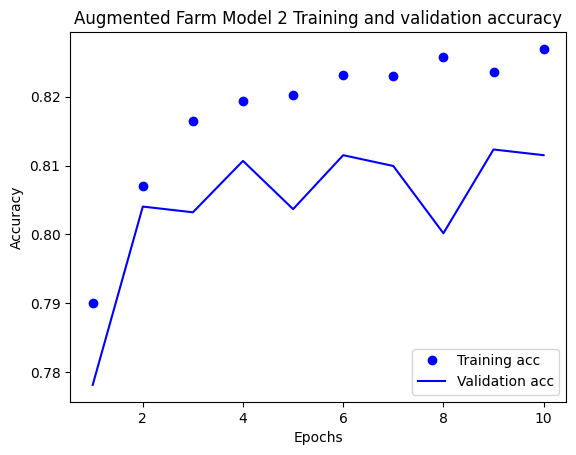

In [31]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 2 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [32]:
print("Training model on Augmented Pixel Data:")
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs)

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Training model on Augmented Pixel Data:
Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7958 - loss: 0.4435 - val_accuracy: 0.8122 - val_loss: 0.4006
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8372 - loss: 0.3650 - val_accuracy: 0.8143 - val_loss: 0.3989
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8430 - loss: 0.3521 - val_accuracy: 0.7832 - val_loss: 0.4513
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8477 - loss: 0.3443 - val_accuracy: 0.8122 - val_loss: 0.4015
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8490 - loss: 0.3398 - val_accuracy: 0.8146 - val_loss: 0.3974
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8552 - loss: 0.3341 - val_accuracy: 0.8019 - val_loss: 0.4024
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8515 - loss: 0.3325 - val_accuracy: 0.8311 - val_loss: 0.3680
Epoch 8/10
1018/1018 ━━━━━━━━━━━━━━━

In [33]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

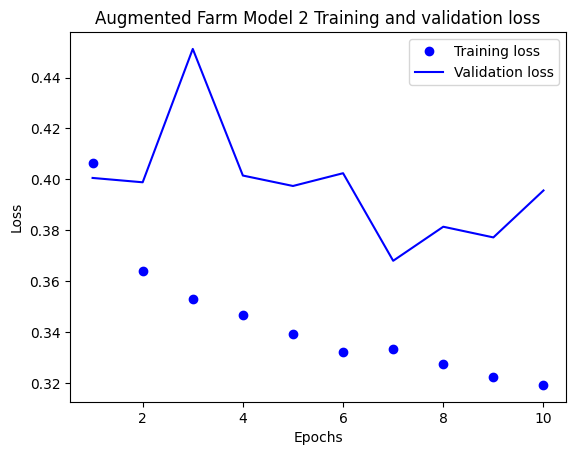

In [34]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

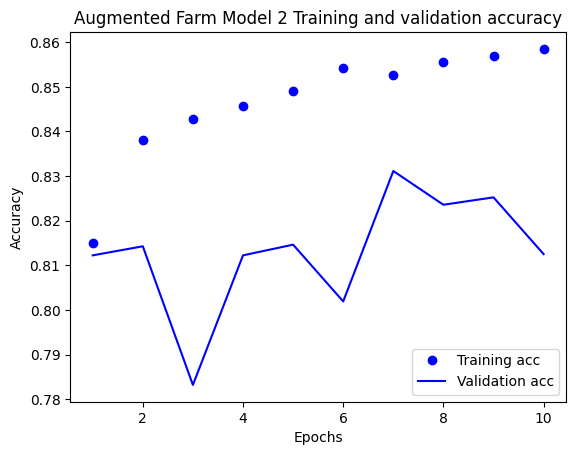

In [35]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 2 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [36]:
print("Training model on Segmented Data:")
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs)


print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Training model on Segmented Data:
Epoch 1/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.8410 - loss: 0.3706 - val_accuracy: 0.8810 - val_loss: 0.2675
Epoch 2/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.8875 - loss: 0.2716 - val_accuracy: 0.8939 - val_loss: 0.2497
Epoch 3/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.8954 - loss: 0.2470 - val_accuracy: 0.8936 - val_loss: 0.2463
Epoch 4/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9037 - loss: 0.2354 - val_accuracy: 0.8912 - val_loss: 0.2445
Epoch 5/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9091 - loss: 0.2213 - val_accuracy: 0.8987 - val_loss: 0.2361
Epoch 6/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9105 - loss: 0.2184 - val_accuracy: 0.9089 - val_loss: 0.2157
Epoch 7/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9112 - loss: 0.2114 - val_accuracy: 0.9099 - val_loss: 0.2211
Epoch 8/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 

In [37]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

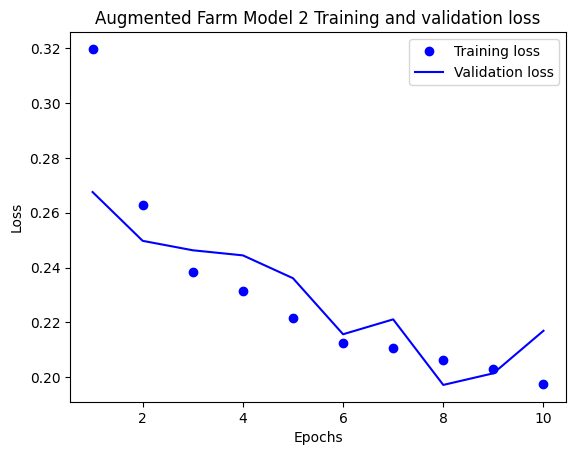

In [38]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

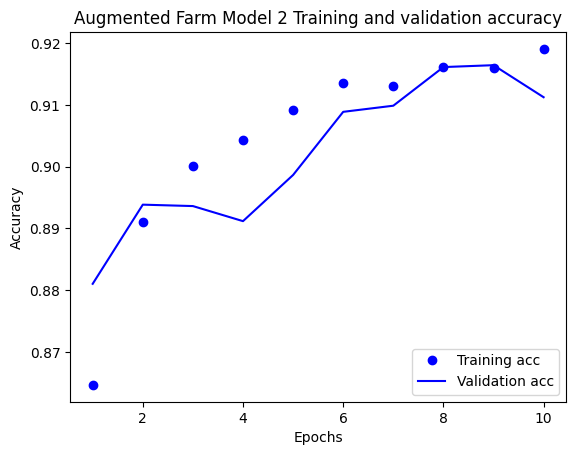

In [39]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 2 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import MobileNetV2

def create_improved_model2(input_shape=(224, 224, 3), l2_factor=0.001):
    # Load the MobileNetV2 base model with pre-trained weights
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    # Define the input layer and pass it through the base model
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layer with ReLU activation and L2 regularization
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_factor))(x)

    # Output layer for binary classification
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create the model
    model = models.Model(inputs, outputs)

    # Compile the model using binary crossentropy loss
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three improved models for the experiments
model_farm = create_improved_model2()
model_pixel = create_improved_model2()
model_segmented = create_improved_model2()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

# Define an EarlyStopping callback to halt training when validation loss stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [41]:
# Example training code for the Augmented Farm Data model:
epochs = 10
print("Training model on Augmented Farm Data with Early Stopping and L2 regularization:")
history_farm = model_farm.fit(train_ds_farm,
                              validation_data=val_ds_farm,
                              epochs=epochs,
                              callbacks=[early_stopping])

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))

Training model on Augmented Farm Data with Early Stopping and L2 regularization:
Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.7889 - loss: 0.5564 - val_accuracy: 0.8161 - val_loss: 0.4510
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8201 - loss: 0.4349 - val_accuracy: 0.8232 - val_loss: 0.4256
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8257 - loss: 0.4173 - val_accuracy: 0.8286 - val_loss: 0.4168
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8294 - loss: 0.4062 - val_accuracy: 0.8306 - val_loss: 0.4148
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8353 - loss: 0.4016 - val_accuracy: 0.8299 - val_loss: 0.4067
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8344 - loss: 0.3977 - val_accuracy: 0.8302 - val_loss: 0.4064
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8420 - loss: 0.3888 - val_accuracy: 0.8276 - val_loss: 0.

In [42]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

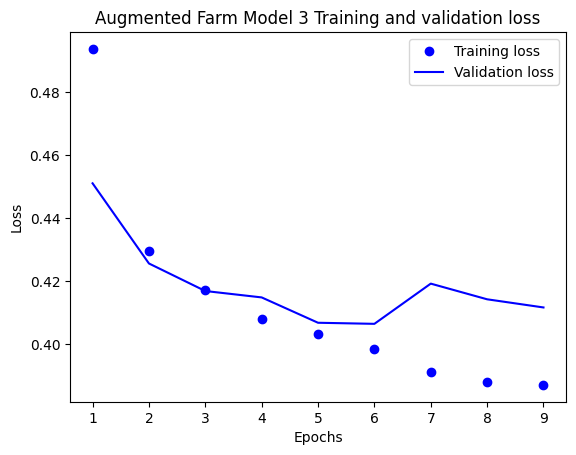

In [43]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 3 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

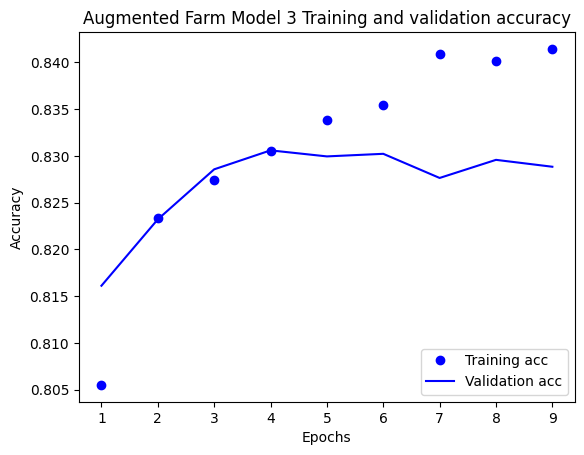

In [44]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [45]:
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.8160 - loss: 0.4925 - val_accuracy: 0.8569 - val_loss: 0.3556
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8523 - loss: 0.3655 - val_accuracy: 0.8481 - val_loss: 0.3690
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8583 - loss: 0.3487 - val_accuracy: 0.8612 - val_loss: 0.3376
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8634 - loss: 0.3391 - val_accuracy: 0.8646 - val_loss: 0.3373
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8686 - loss: 0.3302 - val_accuracy: 0.8349 - val_loss: 0.3848
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8694 - loss: 0.3285 - val_accuracy: 0.8710 - val_loss: 0.3238
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8713 - loss: 0.3231 - val_accuracy: 0.8749 - val_loss: 0.3141
Epoch 8/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8741 -

In [46]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

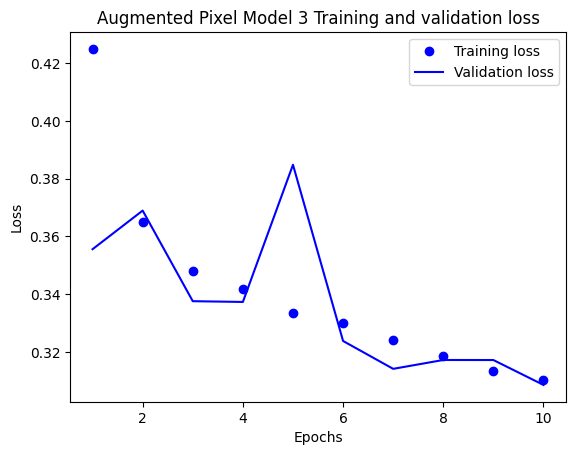

In [47]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Pixel Model 3 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

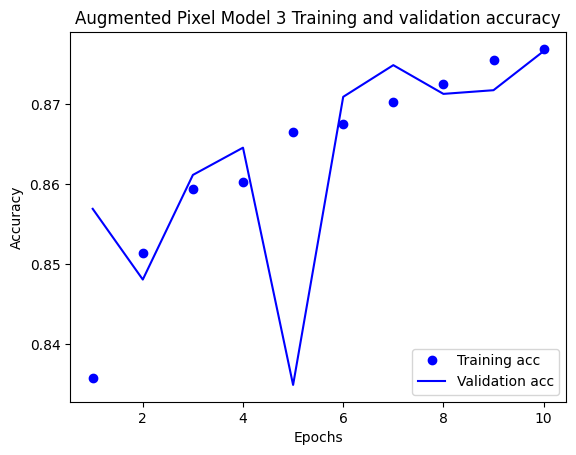

In [48]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Pixel Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [49]:
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Epoch 1/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8836 - loss: 0.3807 - val_accuracy: 0.9319 - val_loss: 0.2215
Epoch 2/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9245 - loss: 0.2330 - val_accuracy: 0.9054 - val_loss: 0.2688
Epoch 3/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9333 - loss: 0.2066 - val_accuracy: 0.9325 - val_loss: 0.2048
Epoch 4/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9394 - loss: 0.1946 - val_accuracy: 0.9345 - val_loss: 0.2023
Epoch 5/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9425 - loss: 0.1826 - val_accuracy: 0.9467 - val_loss: 0.1745
Epoch 6/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9442 - loss: 0.1787 - val_accuracy: 0.9456 - val_loss: 0.1803
Epoch 7/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9486 - loss: 0.1728 - val_accuracy: 0.9454 - val_loss: 0.1776
Epoch 8/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9468 -

In [50]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

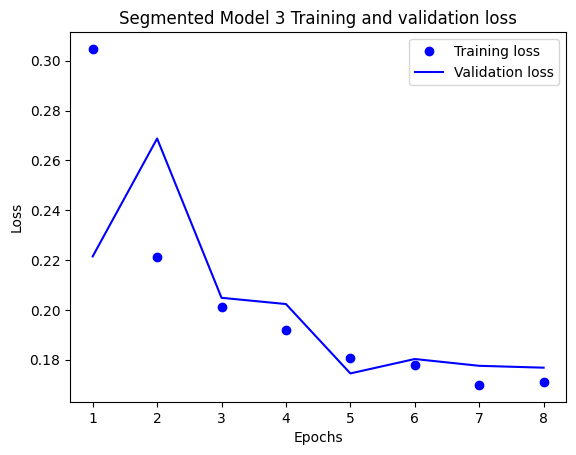

In [51]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Segmented Model 3 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

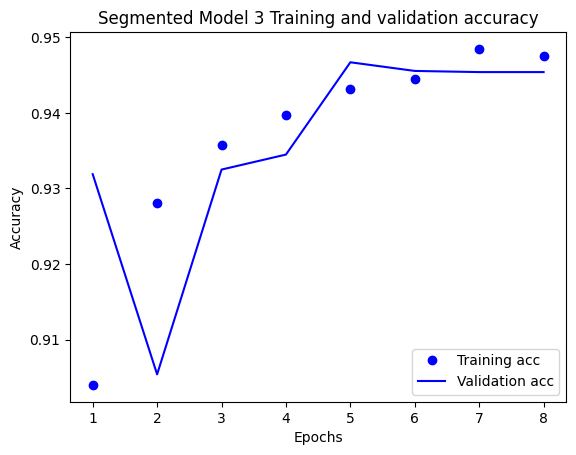

In [52]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Segmented Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import MobileNetV2

def create_improved_model3(input_shape=(224, 224, 3), l2_factor=0.001):
    # Load the MobileNetV2 base model with pre-trained weights and freeze it.
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    # Define the input layer.
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)

    # Global average pooling to reduce spatial dimensions.
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layer with ReLU activation and L2 regularization.
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_factor))(x)

    # Additional Dense layer for further feature transformation.
    x = layers.Dense(64, activation='relu')(x)

    # Output layer for binary classification (healthy vs unhealthy).
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create and compile the model.
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three identical models for the experiments
model_farm = create_improved_model3()
model_pixel = create_improved_model3()
model_segmented = create_improved_model3()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,273 (9.27 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,273 (9.27 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,273 (9.27 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [54]:
# Example training code for the Augmented Farm Data model:
epochs = 10
print("Training model on Augmented Farm Data with Early Stopping and L2 regularization:")
history_farm = model_farm.fit(train_ds_farm,
                              validation_data=val_ds_farm,
                              epochs=epochs,
                              callbacks=[early_stopping])

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))

Training model on Augmented Farm Data with Early Stopping and L2 regularization:
Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.7944 - loss: 0.5404 - val_accuracy: 0.8179 - val_loss: 0.4344
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8219 - loss: 0.4276 - val_accuracy: 0.8221 - val_loss: 0.4258
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8323 - loss: 0.4056 - val_accuracy: 0.8276 - val_loss: 0.4109
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8358 - loss: 0.3989 - val_accuracy: 0.8295 - val_loss: 0.4114
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8358 - loss: 0.3943 - val_accuracy: 0.8313 - val_loss: 0.4003
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8425 - loss: 0.3850 - val_accuracy: 0.8322 - val_loss: 0.4063
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8429 - loss: 0.3796 - val_accuracy: 0.8199 - val_loss: 0.

In [55]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

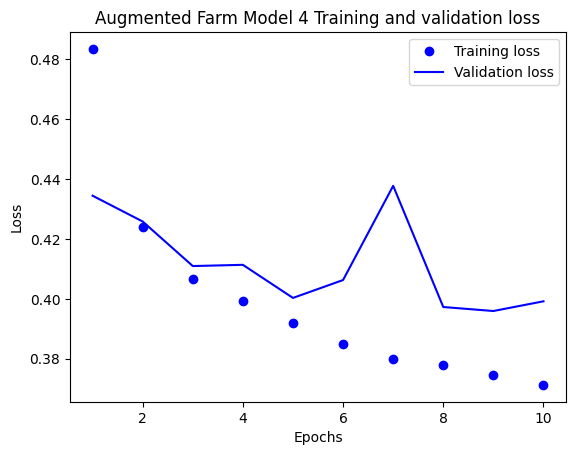

In [56]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 4 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

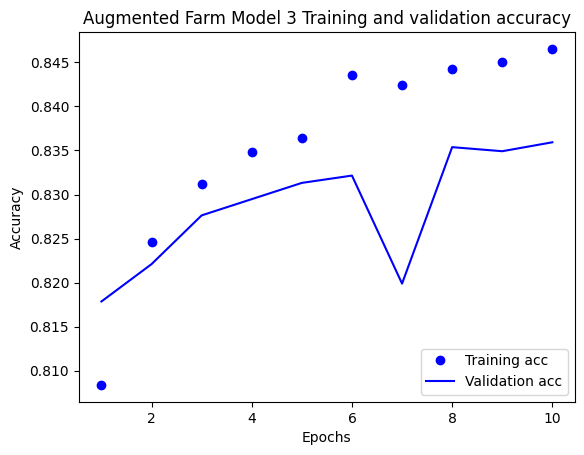

In [57]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [58]:
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Epoch 1/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.8166 - loss: 0.4752 - val_accuracy: 0.8515 - val_loss: 0.3589
Epoch 2/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8561 - loss: 0.3604 - val_accuracy: 0.8413 - val_loss: 0.3722
Epoch 3/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8636 - loss: 0.3413 - val_accuracy: 0.8659 - val_loss: 0.3238
Epoch 4/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8666 - loss: 0.3280 - val_accuracy: 0.8697 - val_loss: 0.3206
Epoch 5/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8702 - loss: 0.3201 - val_accuracy: 0.8712 - val_loss: 0.3185
Epoch 6/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8777 - loss: 0.3076 - val_accuracy: 0.8721 - val_loss: 0.3160
Epoch 7/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8783 - loss: 0.3047 - val_accuracy: 0.8776 - val_loss: 0.3039
Epoch 8/10
1018/1018 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8806 -

In [59]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

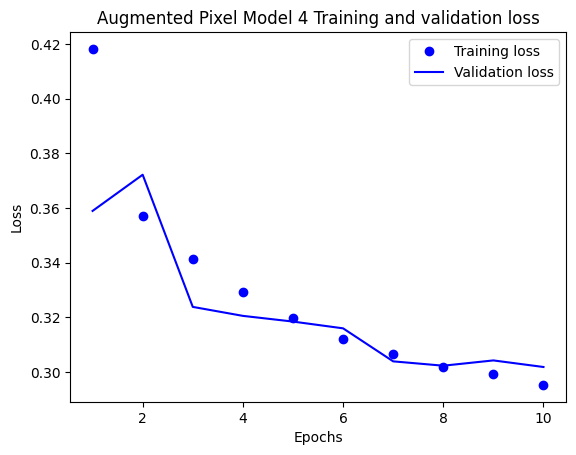

In [60]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Pixel Model 4 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

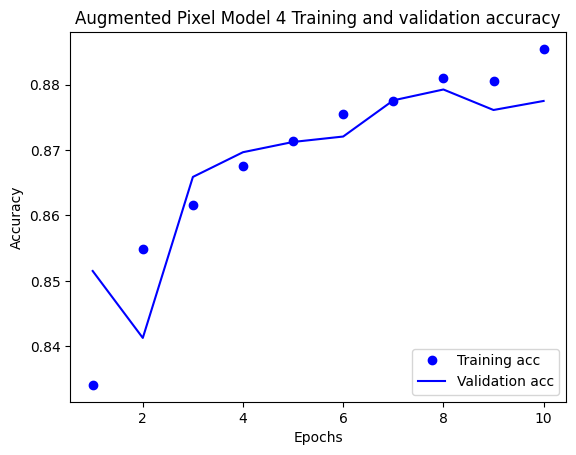

In [61]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Pixel Model 4 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [62]:
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Epoch 1/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8893 - loss: 0.3752 - val_accuracy: 0.8817 - val_loss: 0.3469
Epoch 2/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9324 - loss: 0.2142 - val_accuracy: 0.9421 - val_loss: 0.1868
Epoch 3/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9405 - loss: 0.1894 - val_accuracy: 0.9471 - val_loss: 0.1715
Epoch 4/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9446 - loss: 0.1764 - val_accuracy: 0.9391 - val_loss: 0.1917
Epoch 5/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9479 - loss: 0.1674 - val_accuracy: 0.9454 - val_loss: 0.1765
Epoch 6/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9501 - loss: 0.1640 - val_accuracy: 0.9491 - val_loss: 0.1664
Epoch 7/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9533 - loss: 0.1540 - val_accuracy: 0.9512 - val_loss: 0.1639
Epoch 8/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9548 -

In [63]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

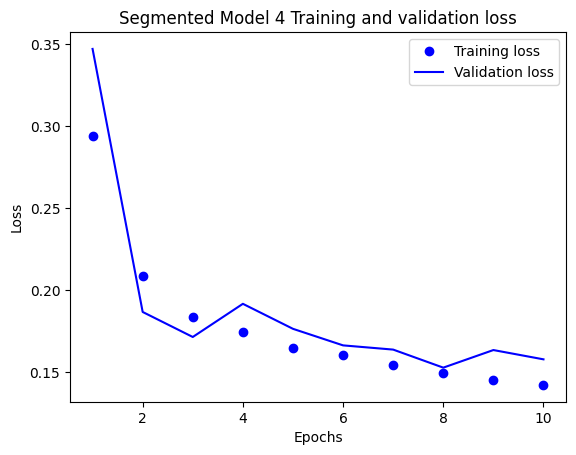

In [64]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Segmented Model 4 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

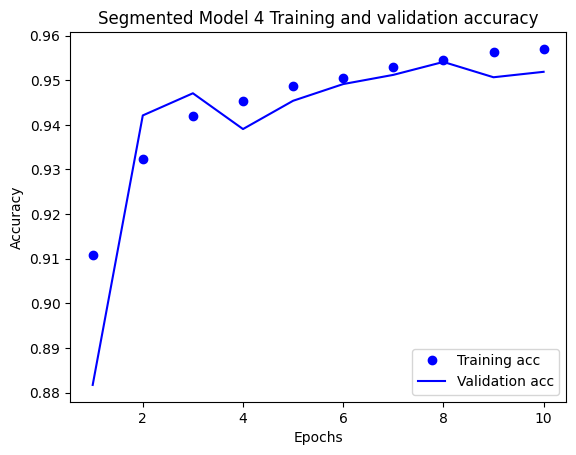

In [65]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Segmented Model 4 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()